## 3. EDA


In [1]:
import numpy as np
import pandas as pd
import glob
import re
from datetime import datetime


import warnings
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
%matplotlib inline 



## READ DATA:

In [2]:
data = pd.read_csv("PROCESSED/data.csv")
data.head().T


,0,1,2,3,4
brand,TOYOTA,TOYOTA,TOYOTA,TOYOTA,TOYOTA
model_name,Toyota Camry VIII (XV70),other,other,"Toyota Corolla AMT X (E140, E150)",other
body_type,sedan,sedan,hatchback 3 doors.,sedan,SUV 5 doors.
doors,4,4,3,4,5
model_date,2017,2020,1999,2006,1999
prod_date,2020,2021,2000,2008,1999
color,black,red,blue,grey,silver
engine_V,3.5,3.5,1.5,1.6,3.4
power,249,249,106,124,178
fuel,petrol,petrol,petrol,petrol,petrol


In [3]:
num_columns = list(pd.read_csv("PROCESSED/num_columns.csv", header=None)[0])
cat_columns = list(pd.read_csv("PROCESSED/cat_columns.csv", header=None)[0])
bin_columns = list(pd.read_csv("PROCESSED/bin_columns.csv", header=None)[0])


In [4]:
num_columns, cat_columns, bin_columns


(['prod_date',
  'model_date',
  'model_age',
  'engine_V',
  'power',
  'mileage',
  'car_age'],
 ['body_type',
  'transmission',
  'brand',
  'fuel',
  'drive',
  'doors',
  'model_name',
  'color',
  'owners'],
 ['dataset_year',
  'petrol_car',
  'new_model',
  'raritet',
  'retro',
  'electrocar',
  'wheel',
  'pass',
  '1_owner',
  'new_car'])

#### Before all category feature turned into numbers, perform analysis using pandas_profiling library:

In [5]:
train_profile = data[data.test_train=="train"].profile_report()
train_profile.to_file("REPORTS/train_profile_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
test_profile = data[data.test_train=="test"].profile_report()
test_profile.to_file("REPORTS/test_profile_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:xlabel='price', ylabel='Density'>

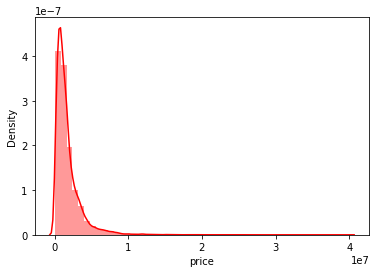

In [7]:
# distribution of target variable:
sns.distplot(data[data.test_train=="train"].price,color="r",kde=True)


In [8]:
# ... long right tail, try to log:
data["price_log"]= np.log(data.price+1)


<AxesSubplot:xlabel='price_log', ylabel='Density'>

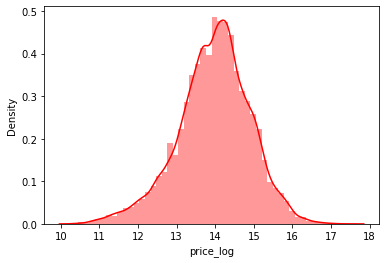

In [9]:
sns.distplot(data[data.test_train=="train"].price_log, color="r",kde=True)


distribution looks better now...

## CATEGORICAL COLUMNS

Let's take a look at categorical columns' distribution and their impact on price:

In [10]:
len(cat_columns)


9

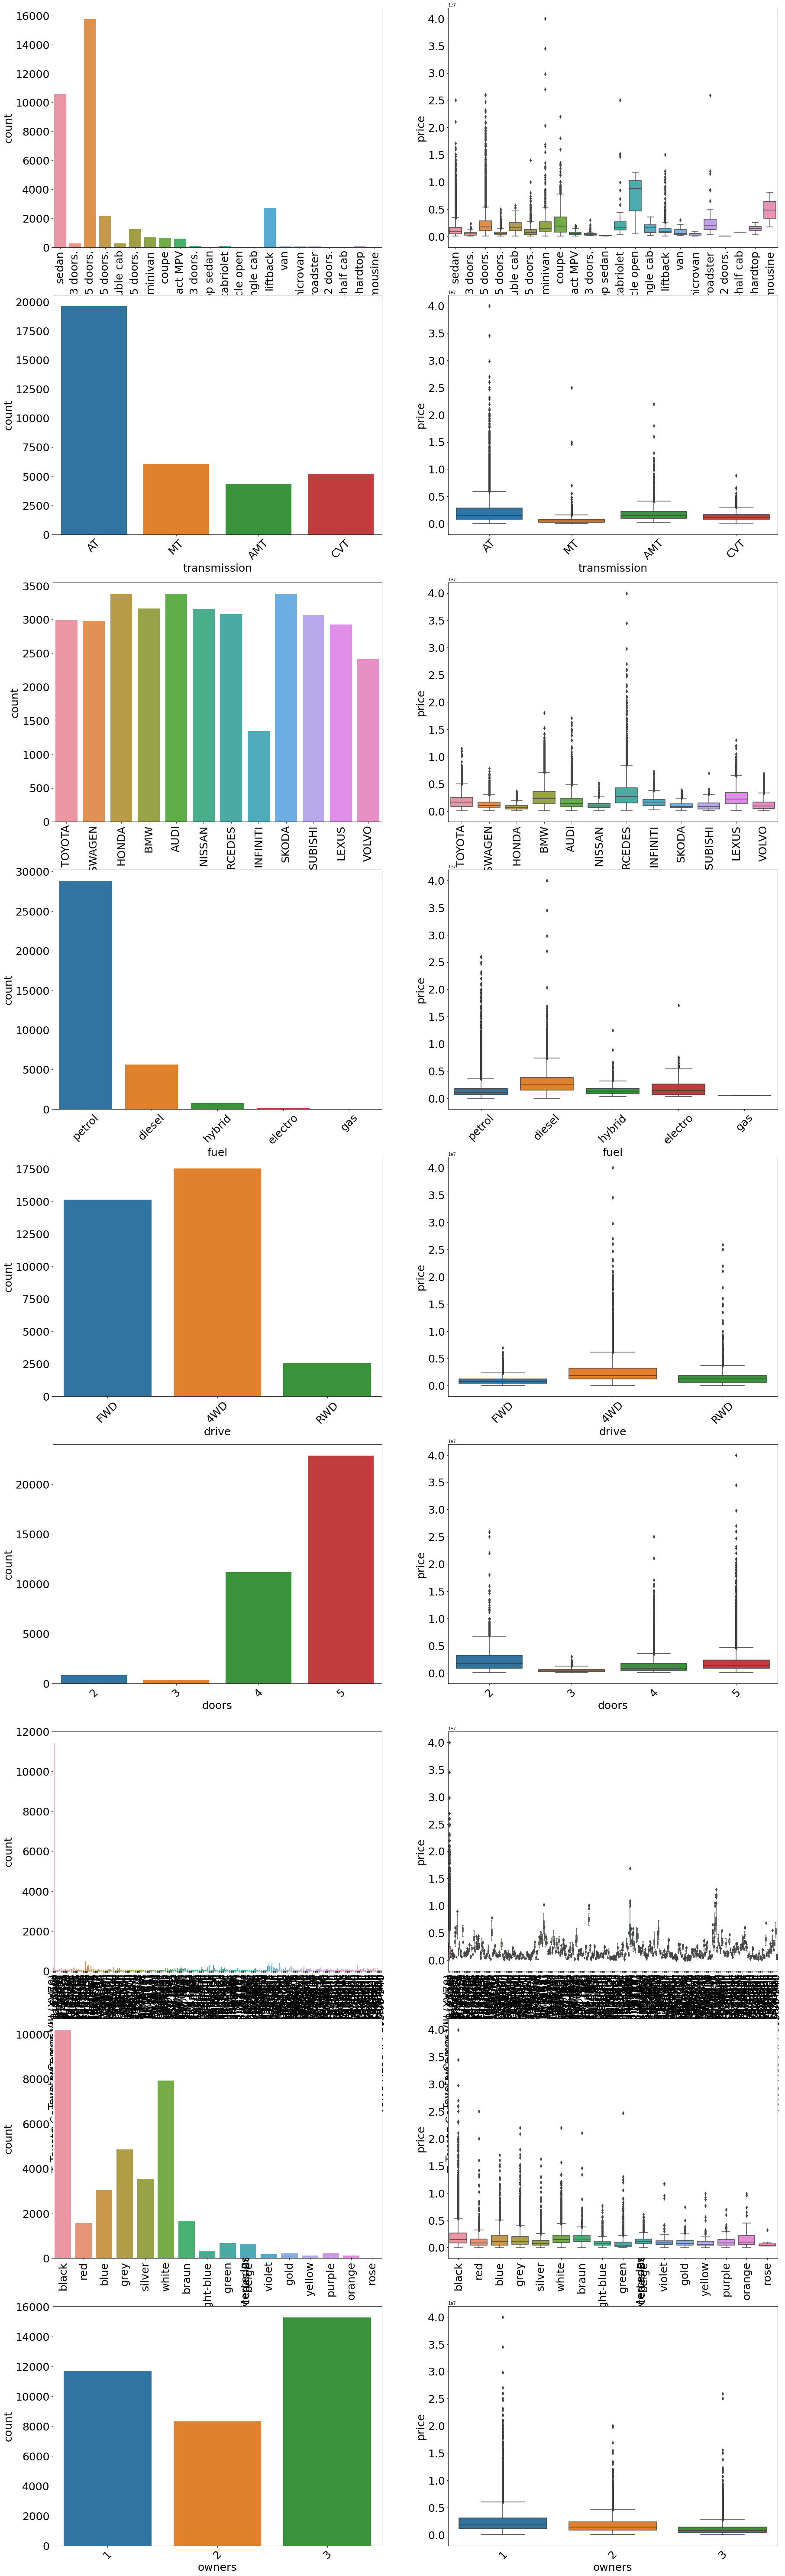

In [11]:
i=1
plt.figure(figsize=(30,120))
for col in cat_columns:
    if data[col].nunique()>5:
        angle=90
    else:
        angle=45
    
    plt.subplot(10,2,i)
    sns.countplot(data[data.test_train=="train"][col])
    plt.xticks(fontsize=25, rotation=angle)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("count",fontsize=25)
    
    i=i+1
    plt.subplot(10,2,i)
    sns.boxplot(x=data[data.test_train=="train"][col],y=data[data.test_train=="train"]["price"])
    plt.xticks(fontsize=25, rotation=angle)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("price",fontsize=25)
    i=i+1

plt.show()

These reports are very confusing, while analysed data should represent the same year or the same brand. 

- Seems the number of model_names is bigger then it shoul be. 
- Seems electrocars are the most expensive ones, but maybe they are also the newest ones. Just a quick look:


In [12]:
data[(data.test_train=="train") & (data.fuel=="electro")].car_age.describe()


count    72.000000
mean      7.041667
std       4.200729
min       1.000000
25%       4.000000
50%       4.000000
75%      11.000000
max      22.000000
Name: car_age, dtype: float64

between 1 and 8 years, so for a better analysis we need to select only 1..8 year old data

In [13]:
data_last8years = data[(data.test_train=="train") & (data.car_age<=8) & (data.car_age>0) ]
data_last8years.shape


(14067, 29)

now we are closer to electrocars' age. Repeate a step before:


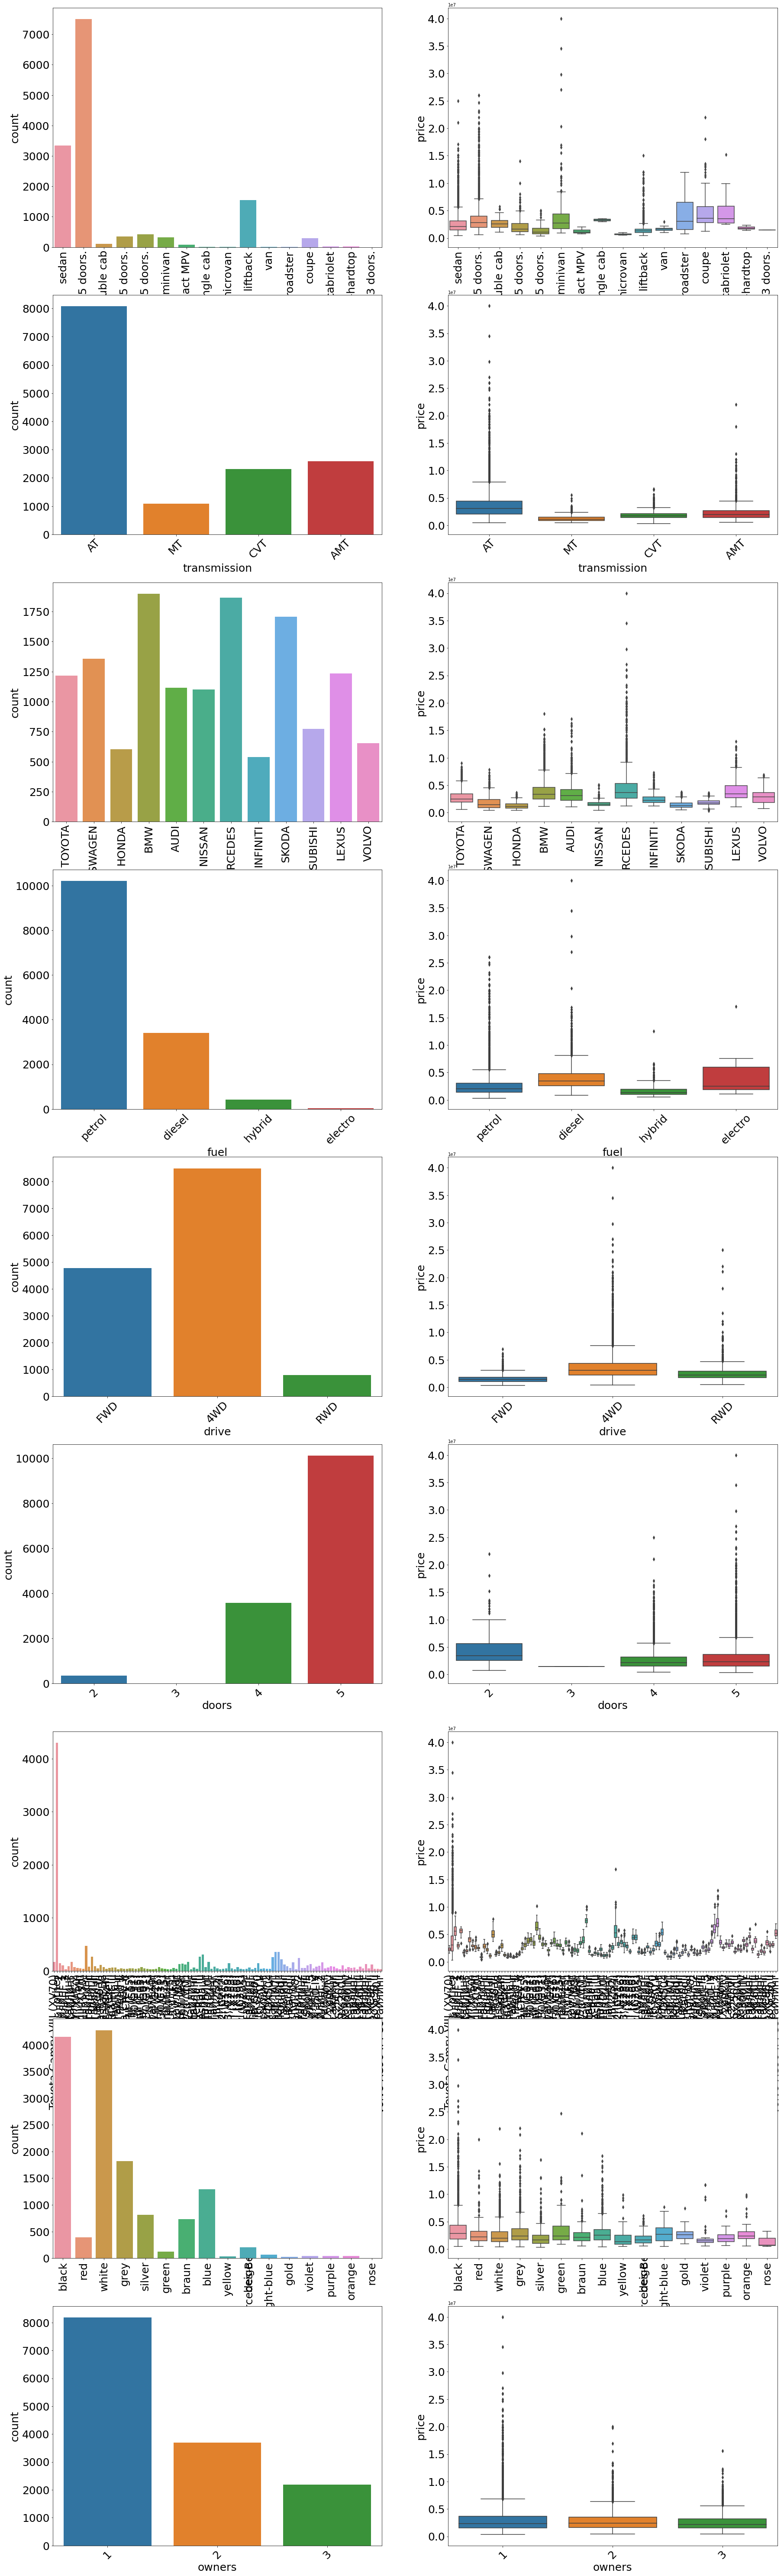

In [14]:
# for cars under 8 years excluding new cars:
i=1
plt.figure(figsize=(30,120))
for col in cat_columns:
    if data_last8years[col].nunique()>5:
        angle=90
    else:
        angle=45
    
    plt.subplot(10,2,i)
    sns.countplot(data_last8years[col])
    plt.xticks(fontsize=25, rotation=angle)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("count",fontsize=25)
    
    i=i+1
    plt.subplot(10,2,i)
    sns.boxplot(x=data_last8years[col],y=data_last8years["price"])
    plt.xticks(fontsize=25, rotation=angle)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("price",fontsize=25)
    i=i+1

plt.show()


OK, agree, electro cars are more expensive, as well as:
   - automatic transmission 
   - cabriolets,
   - full drive,
   - light-blue and green
   - of course BMW!!!

The most expensive model seems to be...... >>>>>>> (resut will be known after all data is collected)
Also, column "other" for model_names looks very different. 


## BINARY COLUMNS:

In [15]:
bin_columns


['dataset_year',
 'petrol_car',
 'new_model',
 'raritet',
 'retro',
 'electrocar',
 'wheel',
 'pass',
 '1_owner',
 'new_car']

In [16]:
# don't need dataset_year:
bin_columns.remove("dataset_year")
bin_columns

['petrol_car',
 'new_model',
 'raritet',
 'retro',
 'electrocar',
 'wheel',
 'pass',
 '1_owner',
 'new_car']

In [17]:
len(bin_columns)


9

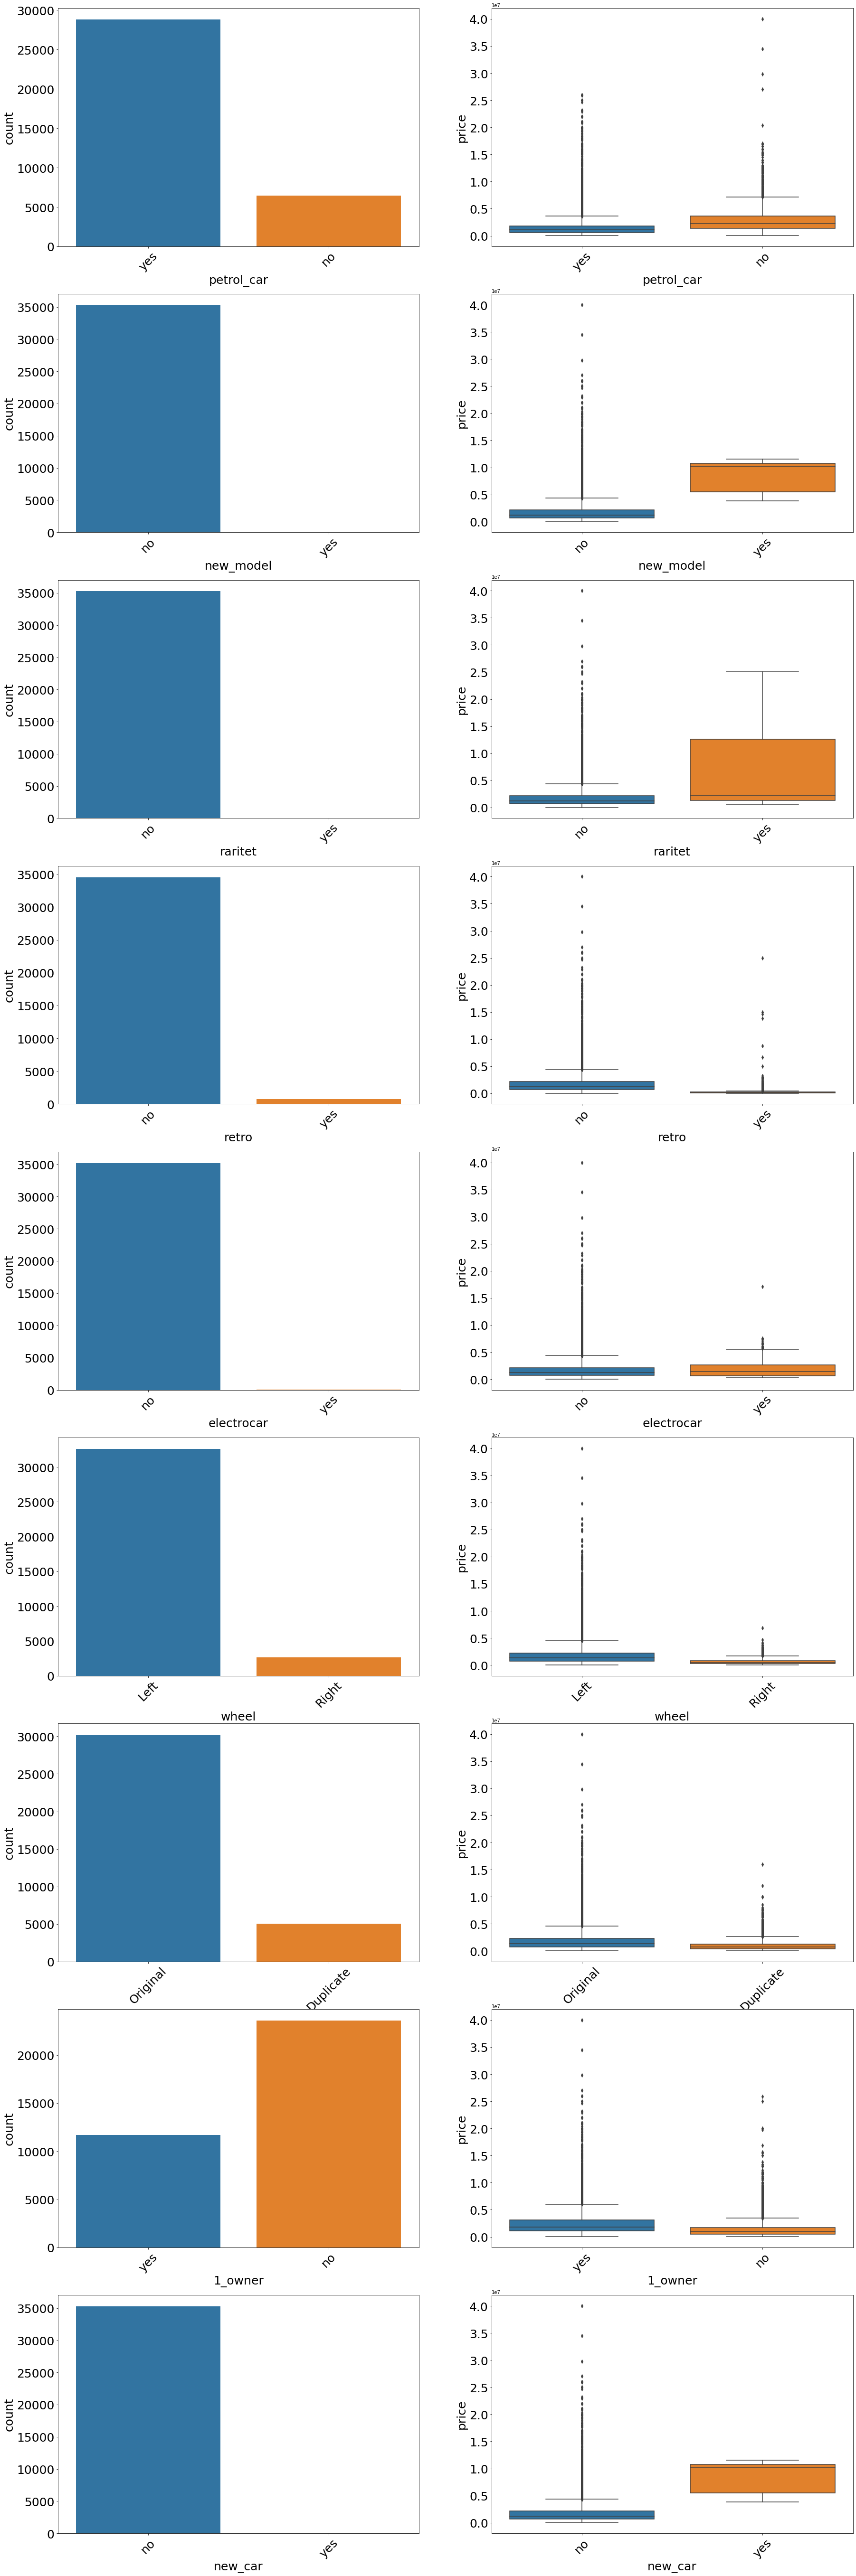

In [18]:
i=1
plt.figure(figsize=(30,120))
for col in bin_columns:
    if data[col].nunique()>5:
        angle=90
    else:
        angle=45
    
    plt.subplot(11,2,i)
    sns.countplot(data[data.test_train=="train"][col])
    plt.xticks(fontsize=25, rotation=angle)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("count",fontsize=25)
    
    i=i+1
    plt.subplot(11,2,i)
    sns.boxplot(x=data[data.test_train=="train"][col],y=data[data.test_train=="train"]["price"])
    plt.xticks(fontsize=25, rotation=angle)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("price",fontsize=25)
    i=i+1

plt.show()


Expensive cars have:
   - original passport
   - more then one owner (surprisingly)
   - left steering wheel,
   - petrol as a fuel... (of course if it is not electro)
   - and it is new
Retro cars are cheaper and raritets are on the same level

## NUMERIC COLUMNS

In [19]:
num_columns

['prod_date',
 'model_date',
 'model_age',
 'engine_V',
 'power',
 'mileage',
 'car_age']

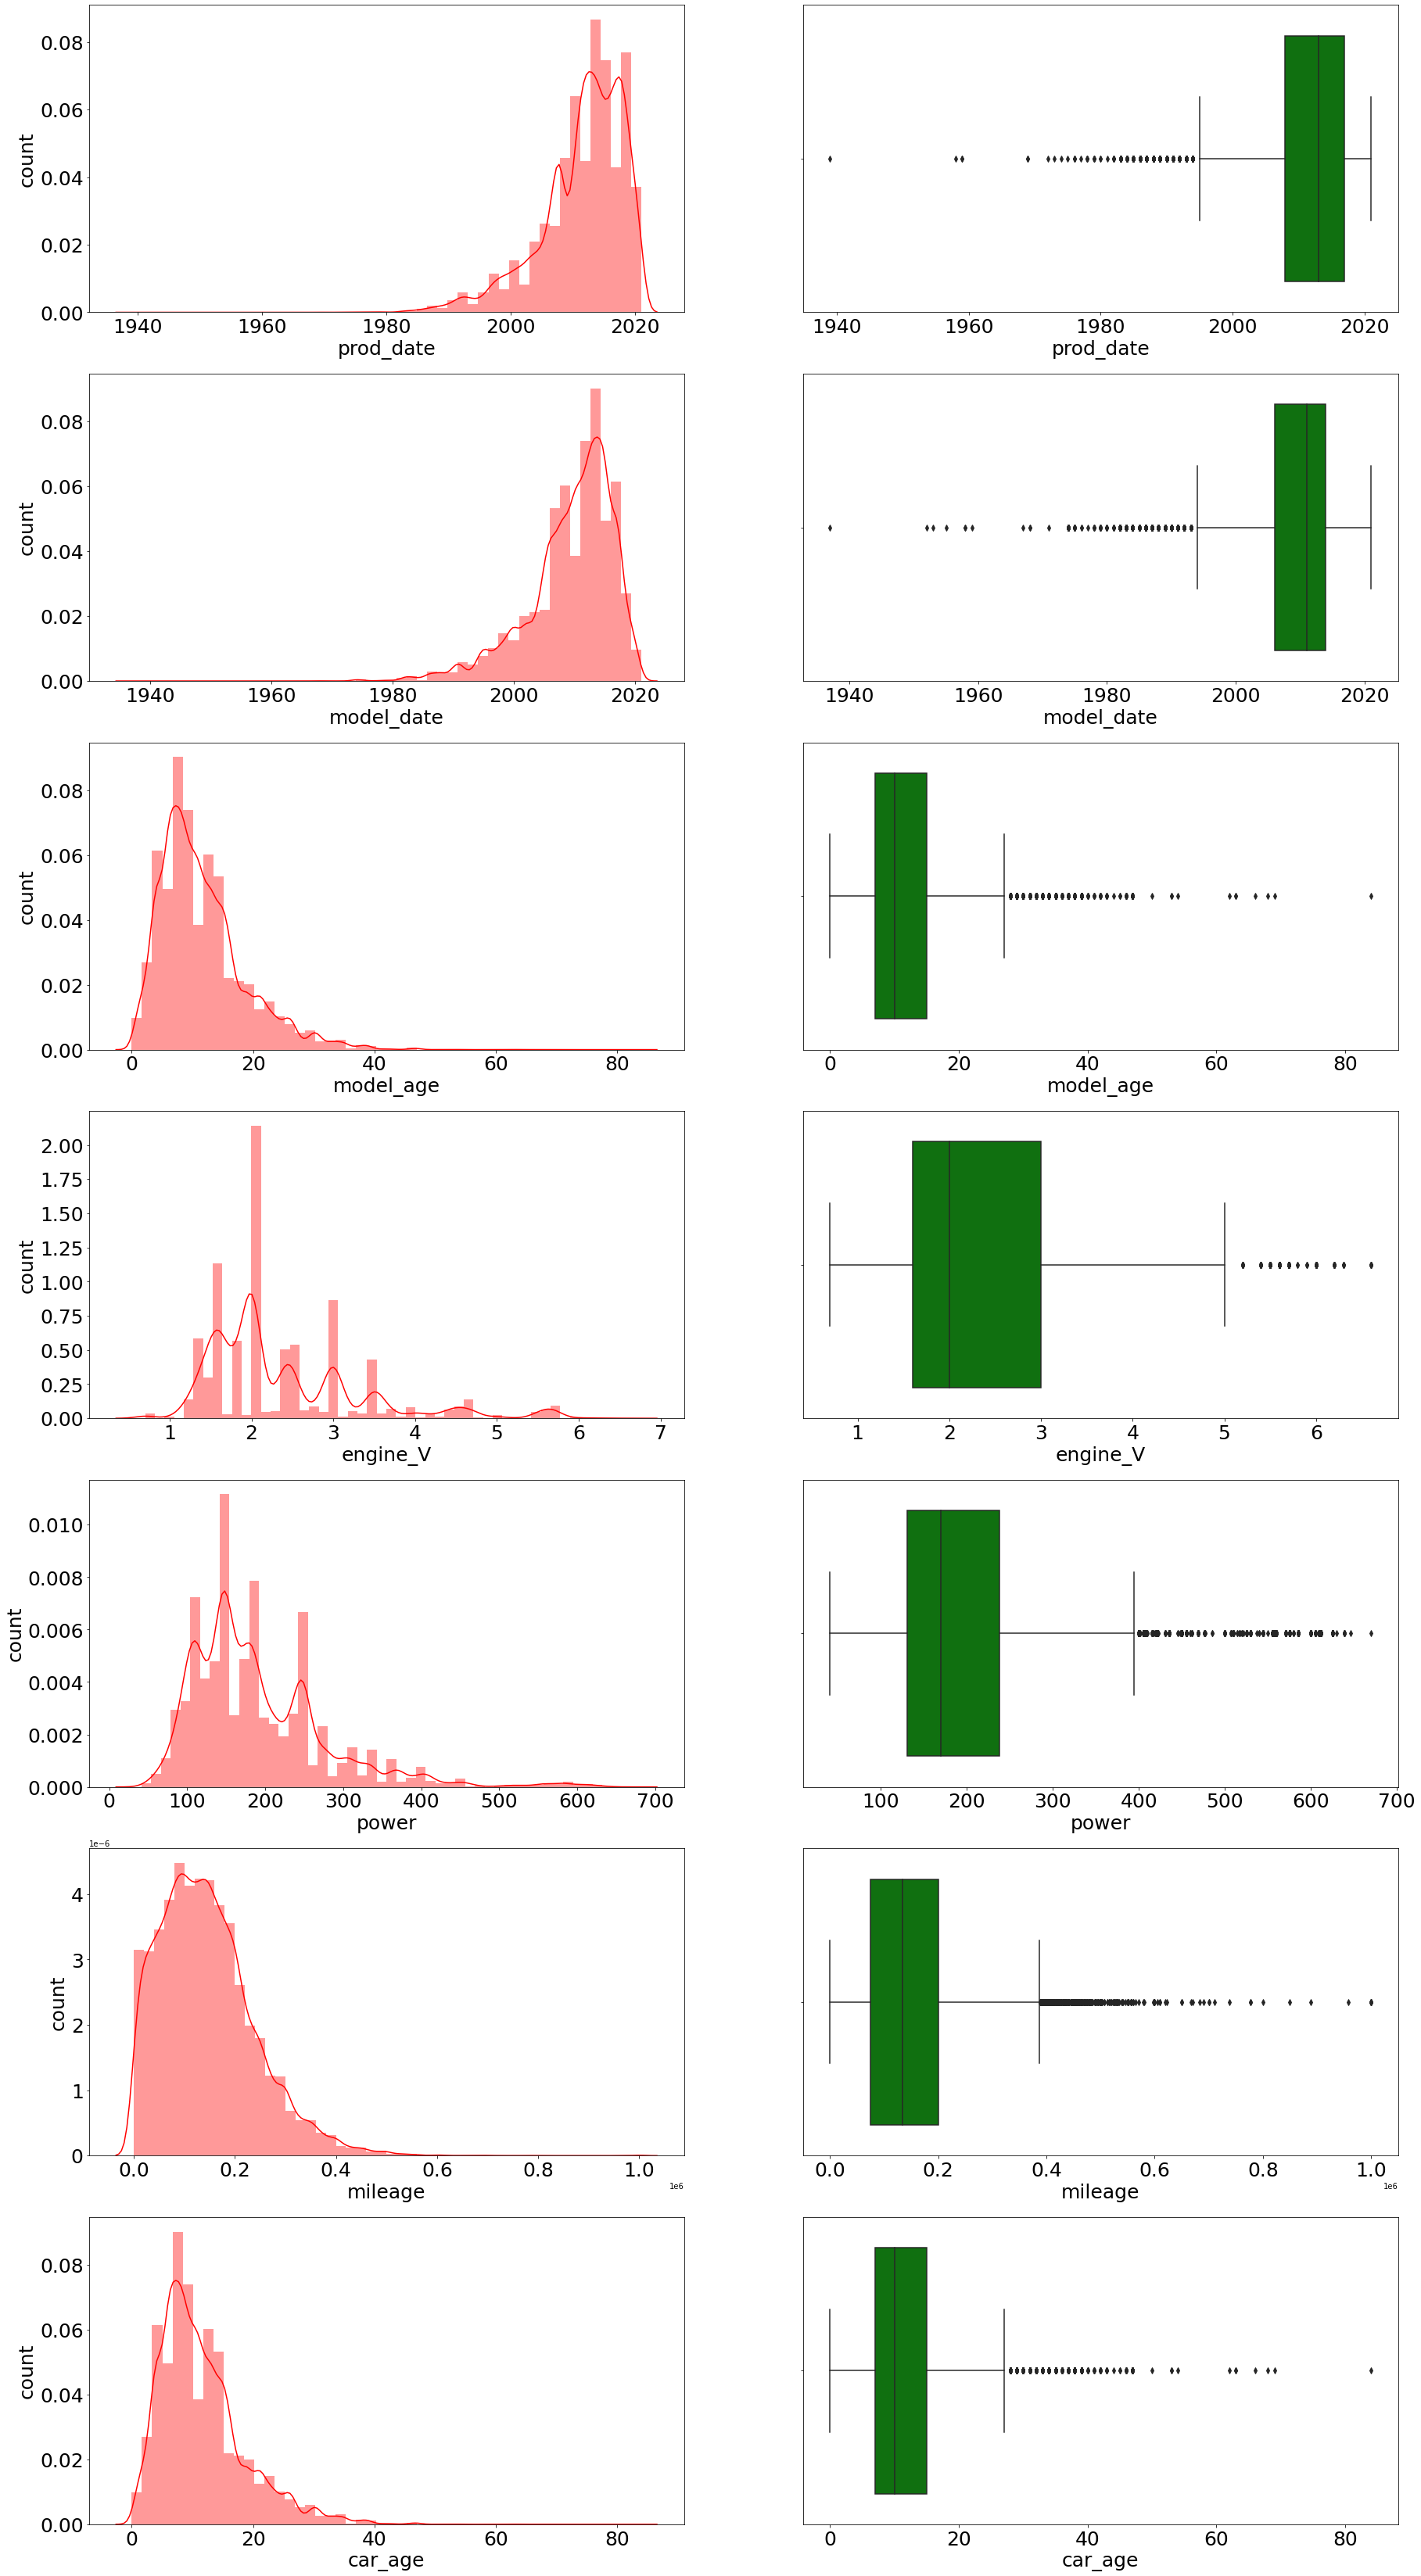

In [20]:
i=1
plt.figure(figsize=(30,120))
for col in num_columns:
    plt.subplot(14,2,i)
    sns.distplot(data[data.test_train=="train"][col],color="r")
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("count",fontsize=25)
    
    i=i+1
    plt.subplot(14,2,i)
    sns.boxplot(data[data.test_train=="train"][col],color="green")
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    i=i+1

plt.show()

## CORRELATION 

In [21]:
#checking the correlation between the pair of columns
data[data.test_train=="train"].corr()


,doors,model_date,prod_date,engine_V,power,mileage,owners,price,dataset_year,model_age,car_age,price_log
doors,1.000000,0.211647,0.221651,0.038873,-0.027172,-0.114142,-0.180752,0.073346,NaN,-0.211647,-0.211647,0.169818
model_date,0.211647,1.000000,0.974917,0.025365,0.229900,-0.709933,-0.502578,0.519425,NaN,-1.000000,-1.000000,0.797427
prod_date,0.221651,0.974917,1.000000,0.002827,0.201030,-0.730803,-0.529165,0.523797,NaN,-0.974917,-0.974917,0.798915
engine_V,0.038873,0.025365,0.002827,1.000000,0.833887,0.038469,0.106939,0.405366,NaN,-0.025365,-0.025365,0.405585
power,-0.027172,0.229900,0.201030,0.833887,1.000000,-0.154044,0.020629,0.587712,NaN,-0.229900,-0.229900,0.575116
mileage,-0.114142,-0.709933,-0.730803,0.038469,-0.154044,1.000000,0.482966,-0.496105,NaN,0.709933,0.709933,-0.644741
owners,-0.180752,-0.502578,-0.529165,0.106939,0.020629,0.482966,1.000000,-0.336926,NaN,0.502578,0.502578,-0.428098
price,0.073346,0.519425,0.523797,0.405366,0.587712,-0.496105,-0.336926,1.000000,NaN,-0.519425,-0.519425,0.796881
dataset_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_age,-0.211647,-1.000000,-0.974917,-0.025365,-0.229900,0.709933,0.502578,-0.519425,NaN,1.000000,1.000000,-0.797427


In [22]:
# is everything ok with dataset_year?
data.dataset_year.head()


0    2021
1    2021
2    2021
3    2021
4    2021
Name: dataset_year, dtype: int64

<AxesSubplot:>

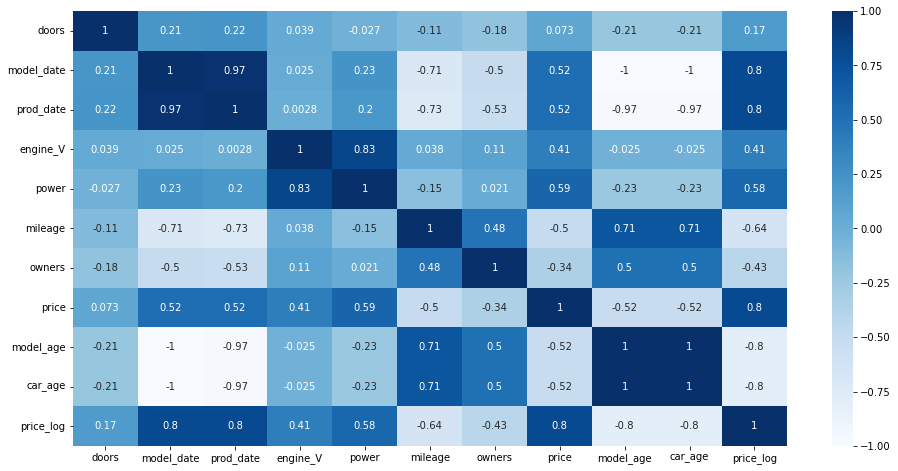

In [23]:
# heatmap 
plt.figure(figsize=(16,8))
sns.heatmap(data[data.test_train=="train"].drop("dataset_year", axis=1).corr(),annot=True, cmap="Blues")


In [24]:
# On the base on correlations, mark columns to drop and columns to logarith:
drop_columns = ["model_date", "prod_date", "dataset_year"]
log_columns = ["engine_V","power", "mileage", "model_age", "car_age"]
# convert to dataframes:
df_drop_columns = pd.DataFrame(drop_columns)
df_log_columns = pd.DataFrame(log_columns)
# save them to files:
df_drop_columns.to_csv("PROCESSED/drop_columns.csv", mode='w', header=False, index=False)
df_log_columns.to_csv("PROCESSED/log_columns.csv", mode='w', header=False, index=False)


####  Next: 4. Feature engineering

